# One Sample T-Test - Lab

## Introduction
Just as you previously used the t-distribution to provide confidence intervals for estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a one sample t-test and make conclusions about an experiment based on the results

### Exercise 1: 

Create a function in Python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value, and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using `seaborn` of the distribution to check for normality.

In [30]:
def one_sample_ttest(sample, popmean, alpha):

    # Visualize sample distribution for normality 

    sns.histplot(sample, kde=True)
    plt.title('Sample_  Distribution')
    plt.show()

    # Population mean 
    
    # Sample mean (x̄) using NumPy mean()
    x_hat = np.mean(sample)
    # Sample Standard Deviation (sigma) using Numpy
    sigma = np.std(sample, ddof=1)
    # Degrees of freedom
    df = len(sample) - 1
    # Calculate the critical t-value
    t_critical = stats.t.ppf(1-alpha, df)
    # Calculate the t-value and p-value      
    t_value = (x_hat - popmean) / (sigma / np.sqrt(len(sample)))
    p_value = stats.t.sf(t_value, df)
    # return results
    return t_value, t_critical, p_value


### Exercise 2:

Use the function created in Exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online-course on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternative hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t- and p-values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

In [3]:
# import libraries
import numpy as np
from scipy import stats
from statsmodels.stats import proportion as prt
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sample = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3])

In [7]:
# population mean
popmean = 65
alpha = 0.05
# sample mean
x_hat = np.mean(sample)
# sample standard deviation
sigma = np.std(sample, ddof=1)
# sample size 
sample_size = len(sample)
# degrees of freedom
df = sample_size -1


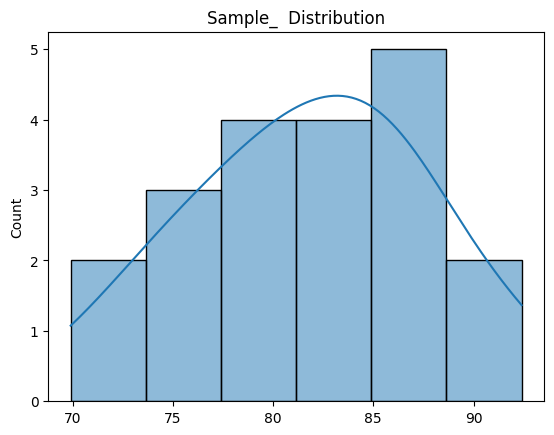

t-value: 12.687592157174493
t-critical: 1.729132811521367
p-value: 5.026677797226412e-11


In [31]:
t_value, t_critical, p_value = one_sample_ttest(sample, popmean, alpha)

print(f"t-value: {t_value}")
print(f"t-critical: {t_critical}")
print(f"p-value: {p_value}")



In [32]:

if p_value < alpha:
    print("We reject the null hypothesis at significance level of 0.05.")  
    print('The online training did not help the students')
else:
    print('We fail to  reject the null hypothesis at significance level of 0.05')
    print('The online training helped the students')

We reject the null hypothesis at significance level of 0.05.
The online training did not help the students


In [22]:
# corrected score sample
sample_1 = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 80.9, 86.1, 81.0, 85.1, 78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3])


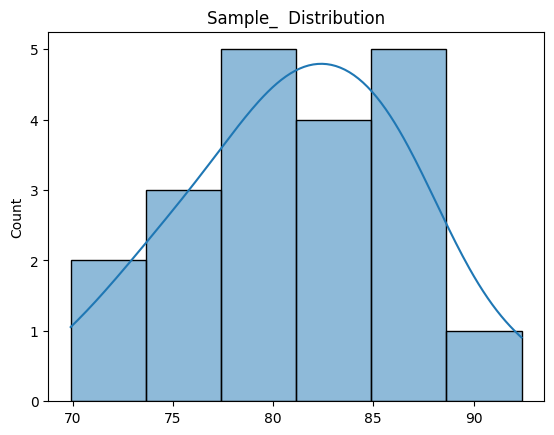

t-value: 13.202088288314906
t-critical: 1.729132811521367
p-value: 2.5416808033411344e-11


In [33]:
t_value, t_critical, p_value = one_sample_ttest(sample_1, popmean, alpha)

print(f"t-value: {t_value}")
print(f"t-critical: {t_critical}")
print(f"p-value: {p_value}")


In [24]:
if t_value > t_critical:
    print("Null hypothesis rejected.")
    print('The scores are significantly different from population mean 65 at a 0.05 significance level.')
else:
    print("Failed to reject the null hypothesis.")
    print('The scores are not significantly different from population mean 65 at a 0.05 significance level.')

Null hypothesis rejected.
The scores are significantly different from population mean 65 at a 0.05 significance level.


In [25]:
# effect size
d = (np.mean(sample) - popmean) / np.std(sample, ddof=1)
d

np.float64(2.837031853423536)

In [28]:
print('The effect size confirms that the difference and findings are substantial and not by chance.')

The effect size confirms that the difference and findings are substantial and not by chance.


## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 